In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## (i)

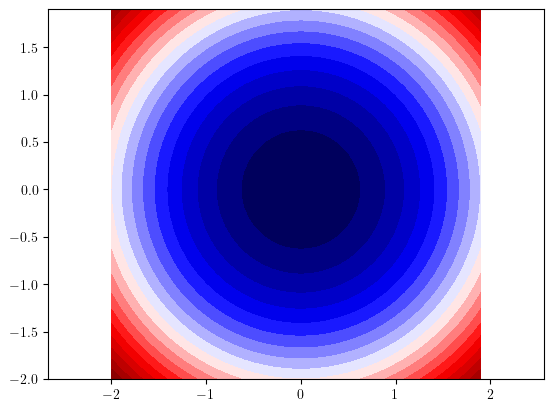

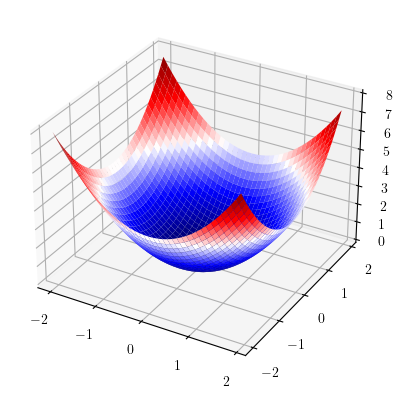

In [25]:
# import packages for basic math, plotting, etc.
from numpy import *
from matplotlib.pyplot import *

# define x and y grids
x_values = arange(-2,2,0.1) 
y_values = x_values
number_of_values = size(x_values)

# initilize function value matrix
example_function = zeros((number_of_values,number_of_values))

# evaluate function value matrix for each point in the 2d-grid
for i in range(number_of_values):
    x = x_values[i]
    for j in range(number_of_values):
        y = y_values[j]

        # actual function for evaluation
        example_function[i,j] = x**2 + y**2

# clear and plot countour of function value matrix with respect to the grid
clf() 
contourf(x_values, y_values, example_function, levels=20, cmap=cm.seismic) # contour plot
axis('equal') # set ration of axes to be equal
show()

# clear and plot surface of function value matrix with respect to the grid
clf()
xgrid, ygrid = meshgrid(x_values, y_values)
ax = axes(projection='3d')
ax.plot_surface(xgrid, ygrid, example_function, cmap=cm.seismic) # surface plot
show()

## (ii)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate(function, xgrid, ygrid):
    return function((xgrid, ygrid))

def eq1(X):
    x, y = X
    return np.sin(x*y) * np.exp(-1 * np.sqrt(x**2 + y**2))

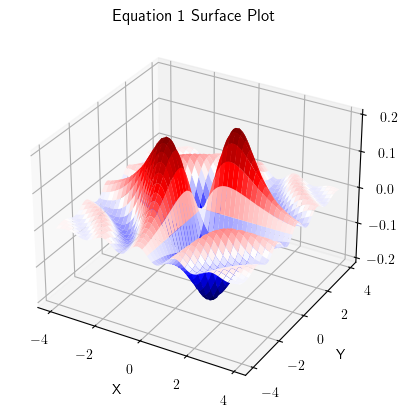

In [27]:
x_values, y_values = arange(-4,4,0.1), arange(-4,4,0.1) 
xgrid, ygrid = np.meshgrid(x_values, y_values)
eq1_eval = evaluate(eq1, xgrid, ygrid)

ax = axes(projection='3d')
ax.plot_surface(xgrid, ygrid, eq1_eval, cmap=cm.seismic)
ax.set_title('Equation 1 Surface Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('Visualizations/1_ii.png')

## (iii)

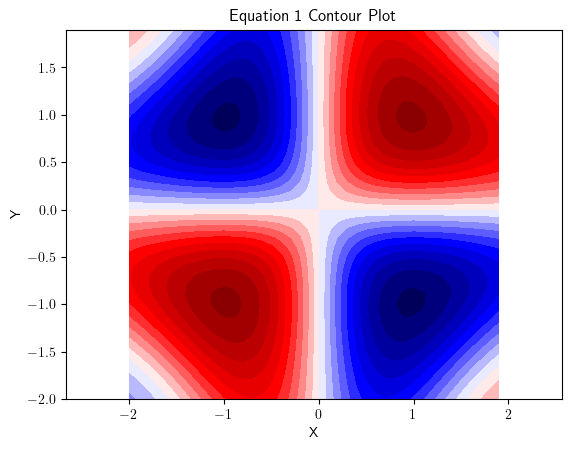

In [28]:
x_values, y_values = arange(-2,2,0.1), arange(-2,2,0.1)
xgrid, ygrid = np.meshgrid(x_values, y_values)
eq1_eval = evaluate(eq1, xgrid, ygrid)

fig, ax = plt.subplots()
ax.contourf(xgrid, ygrid, eq1_eval, levels=20, cmap=cm.seismic)
ax.axis('equal') 
ax.set_title('Equation 1 Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('Visualizations/1_iii.png')

## (iv)

In [29]:
def eq2(X):
    x, y = X
    k, m = np.arange(1, 10, 2)[:, None], np.arange(1, 10, 2)[None, :]
    return np.sum(np.sin(k*x[..., None, None]) * np.sin(m*y[..., None, None]) / (k*m), axis=(2, 3))

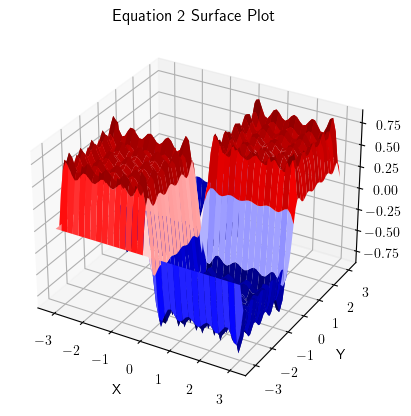

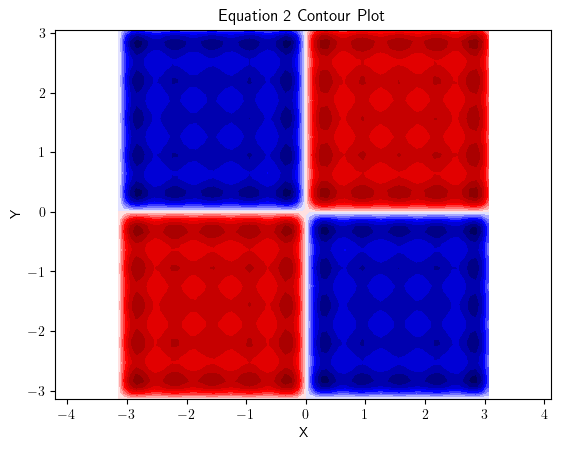

In [30]:
x_values, y_values = arange(-1*np.pi,np.pi,0.1), arange(-1*np.pi,np.pi,0.1)
xgrid, ygrid = np.meshgrid(x_values, y_values)
eq2_eval = evaluate(eq2, xgrid, ygrid)

ax = axes(projection='3d')
ax.plot_surface(xgrid, ygrid, eq2_eval, cmap=cm.seismic)
ax.set_title('Equation 2 Surface Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('Visualizations/1_iv_1.png')

fig, ax = plt.subplots()
ax.contourf(x_values, y_values, eq2_eval, levels=20, cmap=cm.seismic)
ax.axis('equal') 
ax.set_title('Equation 2 Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.savefig('Visualizations/1_iv_2.png')

# Question 2

## (i)

In [31]:
M = np.zeros((9,2))
count = 0
for i in range(-1,2):
    for j in range(-1,2):
        M[count,:] = [i, j]
        count = count + 1

M

array([[-1., -1.],
       [-1.,  0.],
       [-1.,  1.],
       [ 0., -1.],
       [ 0.,  0.],
       [ 0.,  1.],
       [ 1., -1.],
       [ 1.,  0.],
       [ 1.,  1.]])

In [32]:
def M(n):
    M = np.zeros(((2*n+1)**2, 2))
    count = 0
    for i in range(-n,n+1):
        for j in range(-n,n+1):
            M[count,:] = [i, j]
            count = count + 1
    return M

M(2)

array([[-2., -2.],
       [-2., -1.],
       [-2.,  0.],
       [-2.,  1.],
       [-2.,  2.],
       [-1., -2.],
       [-1., -1.],
       [-1.,  0.],
       [-1.,  1.],
       [-1.,  2.],
       [ 0., -2.],
       [ 0., -1.],
       [ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 1., -2.],
       [ 1., -1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 2., -2.],
       [ 2., -1.],
       [ 2.,  0.],
       [ 2.,  1.],
       [ 2.,  2.]])

# Question 3

## (i)

In [33]:
alpha = 2

def construct_K(n, spacing=1):
    size = int(2 * n / spacing) + 1
    K = np.zeros((size**2, 2))
    count = 0
    for i in np.linspace(-n, n, size):
        for j in np.linspace(-n, n, size):
            K[count,:] = [i, j]
            count += 1
    return K

# (ii)

In [34]:
def S_AB_func(xA, yA, xB, yB, alpha):
    return (0.5*np.pi/alpha) * np.exp(-0.5*alpha* (xA - xB)**2 - 0.5*alpha* (yA - yB)**2)

def H_AB_func(xA, yA, xB, yB, alpha):
    return 0.5* S_AB_func(xA, yA, xB, yB, alpha) * (2*alpha + 1/(2*alpha) - alpha**2 * (xA - xB)**2 - alpha**2 * (yA - yB)**2 \
                            + 0.25*((xA + xB)**2 ) + 0.25*((yA + yB)**2 ))

def S_H_AB_func(xy_A, xy_B, alpha):
    xA, yA = xy_A.T
    xB, yB = xy_B.T
    S_AB =  S_AB_func(xA, yA, xB, yB, alpha)
    H_AB = H_AB_func(xA, yA, xB, yB, alpha)
    return S_AB, H_AB

## (iii)

In [35]:
def find_eigval_eigvec(S_AB, H_AB):
    S_inv_H = np.linalg.inv(S_AB) @ H_AB
    eigval, eigvec = np.linalg.eig(S_inv_H)
    
    index_sort = np.argsort(eigval)
    eigval_sorted = eigval[index_sort]
    eigvec_sorted = eigvec[:, index_sort]
    
    for i in range(len(eigvec_sorted)):
        eigvec_sorted[:,i] /= np.sqrt(eigvec_sorted[:,i] @ S_AB @ eigvec_sorted[:,i])
        
    return eigval_sorted, eigvec_sorted

# Question 4

## (i)

In [36]:
K = construct_K(3)
S_AB, H_AB = S_H_AB_func(K[:,None], K[None,:], alpha)
eigval, eigvec = find_eigval_eigvec(S_AB, H_AB)

eigval[:45]

array([ 1.02550836,  2.06493723,  2.06493723,  3.10436609,  3.12047833,
        3.12047833,  4.15990719,  4.15990719,  4.30436831,  4.30436831,
        5.1137186 ,  5.1137186 ,  5.21544829,  5.34379718,  5.34379718,
        6.15314746,  6.15314746,  6.39933828,  6.39933828,  7.04824575,
        7.04824575,  7.20868857,  7.20868857,  7.27959149,  7.27959149,
        7.58322826,  8.08767461,  8.08767461,  8.31902036,  8.31902036,
        8.39257855,  8.39257855,  9.14321571,  9.14321571,  9.20192884,
        9.37456146,  9.37456146, 10.32710569, 10.32710569, 10.55845144,
       10.55845144, 11.13645598, 11.13645598, 11.36780173, 11.36780173])

## (ii)

The exact energy solutions should increase by one energy unit with the same number of degenerate states as the energy level. The energy values look approximately correct initially, but starts to increase from E = 6 and beyond. 

## (iii)

In [37]:
def energy_plot(ns, n_eigenvals):
    nmax = max(ns)
    Kvals, Evals = [], []

    for n in ns:
        K = construct_K(n)
        S_AB, H_AB = S_H_AB_func(K[:,None], K[None,:], alpha)
        eigval, eigvec = find_eigval_eigvec(S_AB, H_AB)
        Kvals.append(len(K))
        Evals.append(eigval[0:n_eigenvals].real)

    Evals = np.array(Evals)
    for i in range(n_eigenvals):
        plt.plot(Kvals,Evals[:,i], label=f'E={i}')
        
    plt.xlabel("No Basis Functions")
    plt.ylabel('Energy (reduced units)')
    plt.title('Energy Basis Function Dependence')
    plt.savefig(f'Visualizations/4_iv.png')

## (iv)

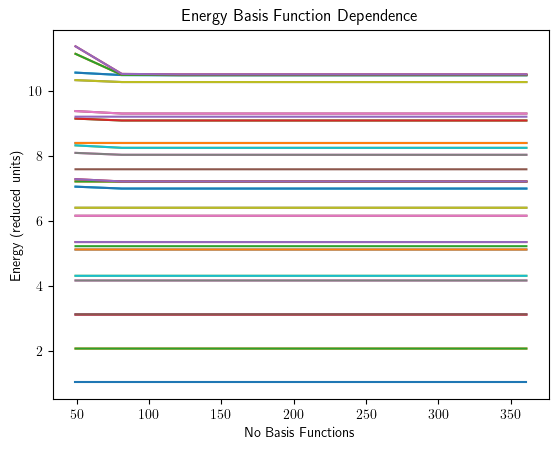

In [38]:
ns = [i for i in range(3, 10)]
energy_plot(ns, 45)

## (v)

The eigenenergies appear to be converged somewhere between 50-100 basis functions. Judging by eye, 100 basis functions appears to be a reasonable approximation, but comparison to tolerence value will be necessary to determine the true convergence. 

## (vi)

In the two particle system, it would be resonable to have $K \approx 225 = 15^2$ bases to account for the additional dimension, which is also equivalent to maintaining $n=7$. From the result in (v) it seems appears that a fewer number of basis sets were necessary to reach convergence, but a comparison to tolerence value will be necessary to confirm it.

## (vii)

Similiarly it would be resonable to have $K \approx 3375 = 15^3$ bases to approximate 9 lowest energies in three dimensions. Increasing dimensionality $N$ increases the basis requirement to the power of the dimensionality $K^N$.

## (viii)

The basis set requirement for electronic structure calculations scales roughly $\backsim \mathcal{O}(K^N)$, and a system of 30 electrons will need $10^{30}$ basis functions if 10 basis functions are needed for one electron. The $\backsim \mathcal{O}(K^N)$ scaling rapidly increases computational cost for additional number of particles or degree of freedoms, limiting electronic structure calculations to small systems. 

# Question 5

## (i)

In [40]:
def gaussian(x, y, x_A, y_A, alpha=2.):
    x_A = np.asarray(x_A)[:, None, None]
    y_A = np.asarray(y_A)[:, None, None]
    return np.exp(-alpha*(x - x_A) ** 2. - alpha*(y - y_A) ** 2.)

def psi(K, eigvec, xgrid, ygrid):
    x_A, y_A = K.T
    gaussians = gaussian(xgrid, ygrid, x_A, y_A)
    return np.tensordot(eigvec, gaussians, axes=(0, 0))

## (ii)

/opt/anaconda3/envs/THG/lib/python3.8/site-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/opt/anaconda3/envs/THG/lib/python3.8/site-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/opt/anaconda3/envs/THG/lib/python3.8/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/anaconda3/envs/THG/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


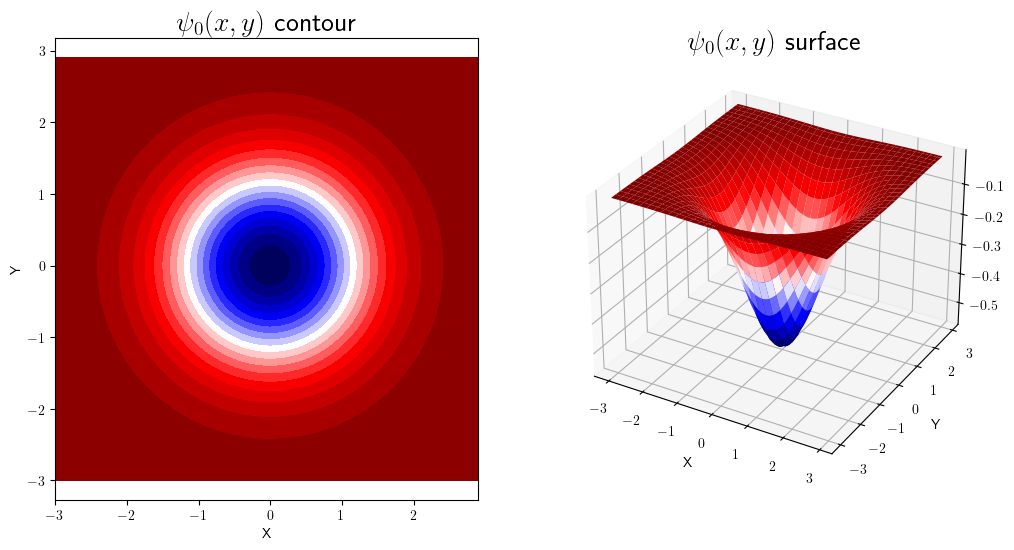

In [41]:
K = construct_K(9, 0.5)
S_AB, H_AB = S_H_AB_func(K[:,None], K[None,:], alpha)
eigval, eigvec = find_eigval_eigvec(S_AB, H_AB)

x_space, y_space = arange(-3,3,0.1), arange(-3,3,0.1) 
xgrid, ygrid = np.meshgrid(x_space, y_space)
eval = psi(K, eigvec, xgrid, ygrid)


plt.rcParams['text.usetex'] = True

fig, axes = plt.subplots(1,2,figsize=(12, 6))
axes[0].contourf(xgrid, ygrid, eval[0], levels=20, cmap=cm.seismic)
axes[0].axis('equal') 
axes[0].set_title(r'$\psi_0 (x,y)$ contour', fontsize=20)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

fig.delaxes(axes[1])
ax3d = fig.add_subplot(1, 2, 2, projection='3d')
ax3d.plot_surface(xgrid, ygrid, eval[0], cmap=cm.seismic)
ax3d.set_title(r'$\psi_0 (x,y)$ surface', fontsize=20)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')

plt.savefig(f'Visualizations/5_ii.png')

## (iii)

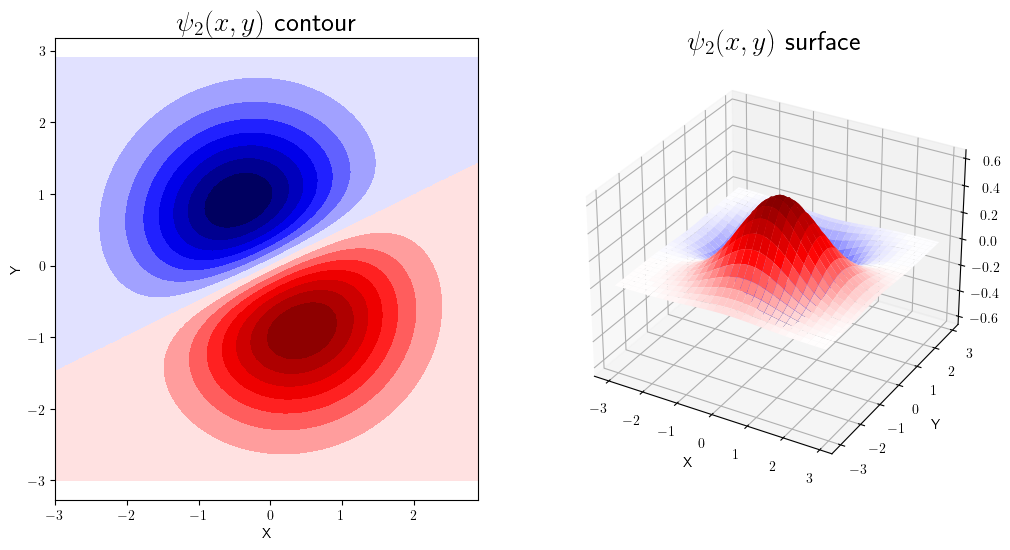

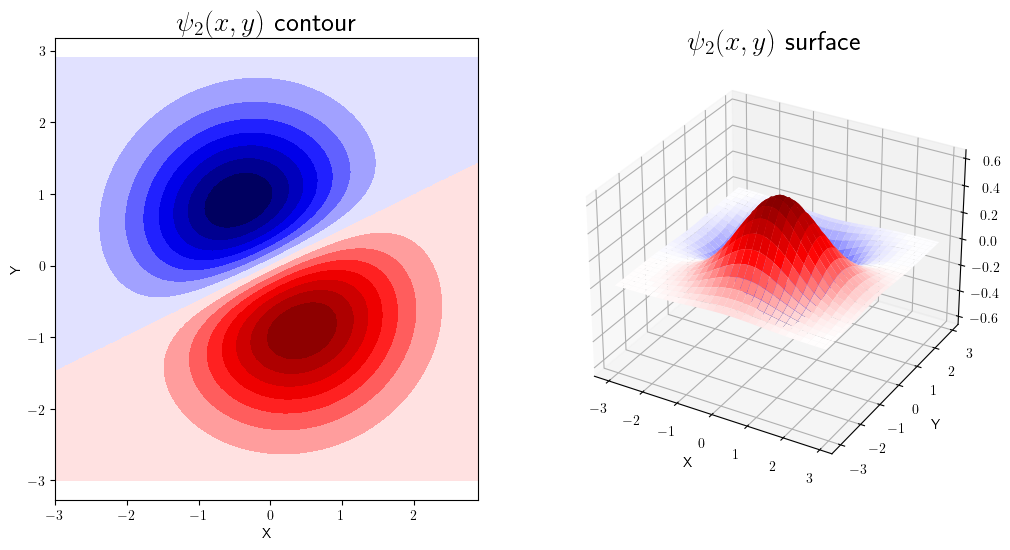

In [42]:
for i in range(1, 3):    
    fig, axes = plt.subplots(1,2,figsize=(12, 6))
    axes[0].contourf(xgrid, ygrid, eval[i], levels=20, cmap=cm.seismic)
    axes[0].axis('equal') 
    axes[0].set_title(r'$\psi_2 (x,y)$ contour', fontsize=20)
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    
    fig.delaxes(axes[1])
    ax3d = fig.add_subplot(1, 2, 2, projection='3d')
    ax3d.plot_surface(xgrid, ygrid, eval[i], cmap=cm.seismic)
    ax3d.set_title(r'$\psi_2 (x,y)$ surface', fontsize=20)
    ax3d.set_xlabel('X')
    ax3d.set_ylabel('Y')
    
    plt.savefig(f'Visualizations/5_iii_{i}.png')

## (iv)

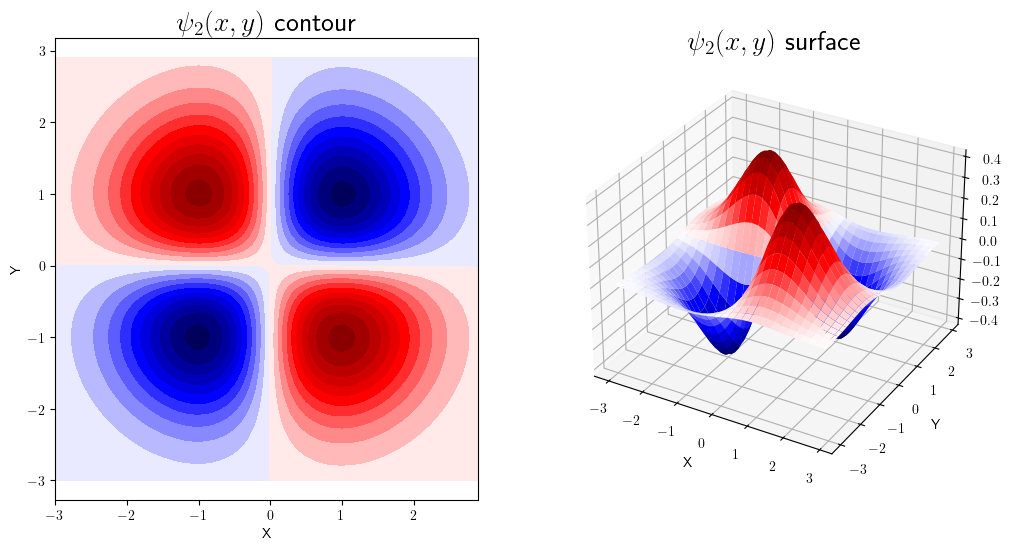

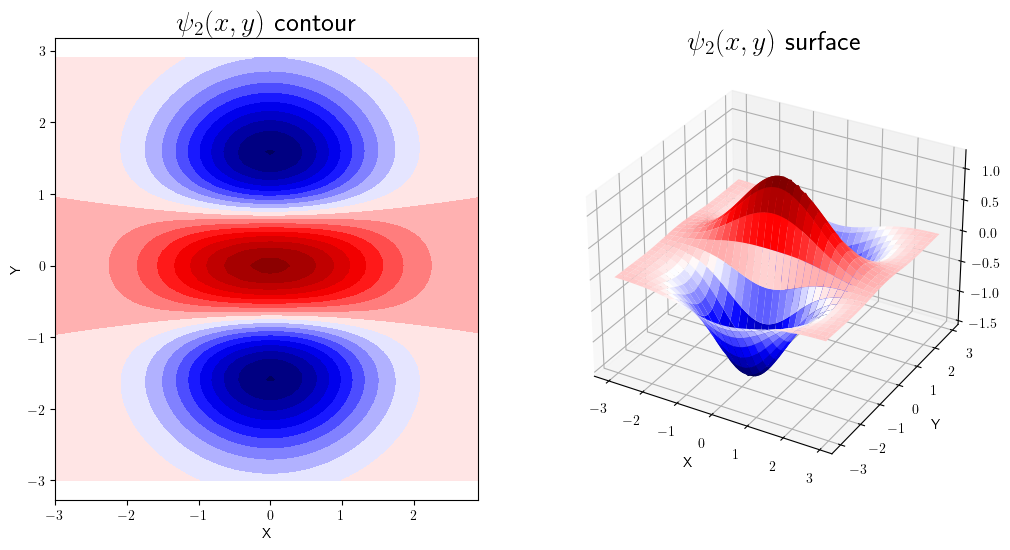

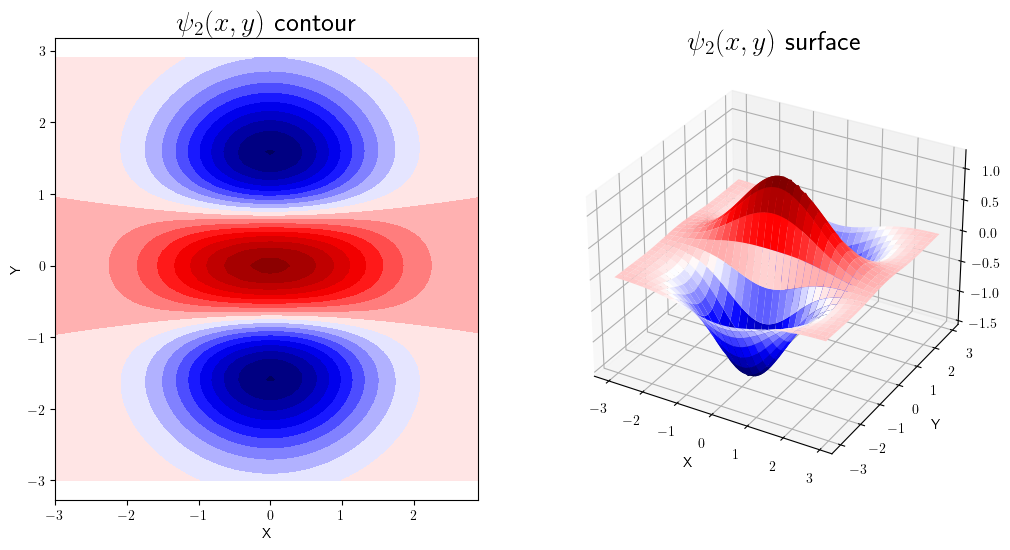

In [43]:
for i in range(3, 6):
    
    fig, axes = plt.subplots(1,2,figsize=(12, 6))
    axes[0].contourf(xgrid, ygrid, eval[i], levels=20, cmap=cm.seismic)
    axes[0].axis('equal') 
    axes[0].set_title(r'$\psi_2 (x,y)$ contour', fontsize=20)
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    
    fig.delaxes(axes[1])
    ax3d = fig.add_subplot(1, 2, 2, projection='3d')
    ax3d.plot_surface(xgrid, ygrid, eval[i], cmap=cm.seismic)
    ax3d.set_title(r'$\psi_2 (x,y)$ surface', fontsize=20)
    ax3d.set_xlabel('X')
    ax3d.set_ylabel('Y')
    
    plt.savefig(f'Visualizations/5_iv_{i}.png')